## Must do


In [1]:
import pandas as pd
import numpy as np
import AD_utils
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing train datatset

train_data = pd.read_csv('tests_dataset/Final_train_dataset.csv')
test_data = pd.read_csv('tests_dataset/Final_test_dataset.csv')

smiles_test = test_data['Canonical_SMILES'].to_list()
smiles_train = train_data['Canonical_SMILES'].to_list()
activity = test_data['Activity_outcome'].to_list()
activity_train = train_data['Activity_outcome'].to_list()
train_data

,PUBCHEM_CID,Activity_outcome,Canonical_SMILES
0,49790754,1,CC1=C(C=CC(=C1)OC)C2=C3C=COC3=C(C=C2)C(=O)NCC4...
1,3580213,1,C1=C(C2=C(N=CN=C2N1C3C(C(C(O3)CO)O)O)N)C(=S)N
2,575908,0,C1=CC=C(C=C1)N2C(=NN=N2)SC3=C(C=C(C=C3)[N+](=O...
3,15055241,1,CC1(CC(=CC(=[N+]2CCCCC2)C1)N3CCCCC3)C.[I-]
4,373978,1,C1=C2C(=C(S1)C3C(C(C(O3)CO)O)O)N=CN=C2N
...,...,...,...
1467,42628600,1,CC1C(CC2CC(NC3=NCC1N23)C(C4=CC(=O)NC(=O)N4)O)O...
1468,327045,1,C1CCN(C1)CCN2C(=O)C3=CC=CC4=CC(=CC(=C43)C2=O)[...
1469,1307598,0,C1COCCN1CCNC2=C3C=NN(C3=NC=N2)C4=CC=C(C=C4)Cl
1470,44825859,1,C1C2=CN=NN2C3=CC=CC=C3C(N1CC4=CC(=CC(=C4)Cl)Cl...


In [3]:
from AD_analysis import AD

ad = AD(smiles_train)

In [4]:
import pickle

with open('rfc_pipeline.pkl', 'rb') as file:
   rfc_model = pickle.load(file)

## Optional

### ERROR: model does not take all inputs, you would have to filter

accuracy:  1 ,  threshold:  0.0 ,  percentage:  0
accuracy:  1 ,  threshold:  0.05 ,  percentage:  0
accuracy:  1 ,  threshold:  0.1 ,  percentage:  0
accuracy:  1 ,  threshold:  0.15 ,  percentage:  0
accuracy:  1.0 ,  threshold:  0.2 ,  percentage:  0.0
accuracy:  1.0 ,  threshold:  0.25 ,  percentage:  0.0
accuracy:  0.9 ,  threshold:  0.3 ,  percentage:  0.02
accuracy:  0.96 ,  threshold:  0.35 ,  percentage:  0.04
accuracy:  0.98 ,  threshold:  0.4 ,  percentage:  0.09
accuracy:  0.98 ,  threshold:  0.45 ,  percentage:  0.13
accuracy:  0.96 ,  threshold:  0.5 ,  percentage:  0.22
accuracy:  0.95 ,  threshold:  0.55 ,  percentage:  0.36
accuracy:  0.91 ,  threshold:  0.6 ,  percentage:  0.52
accuracy:  0.9 ,  threshold:  0.65 ,  percentage:  0.65
accuracy:  0.86 ,  threshold:  0.7 ,  percentage:  0.79
accuracy:  0.81 ,  threshold:  0.75 ,  percentage:  0.92
accuracy:  0.79 ,  threshold:  0.8 ,  percentage:  0.99
accuracy:  0.79 ,  threshold:  0.85 ,  percentage:  1.0
accuracy:  0.7

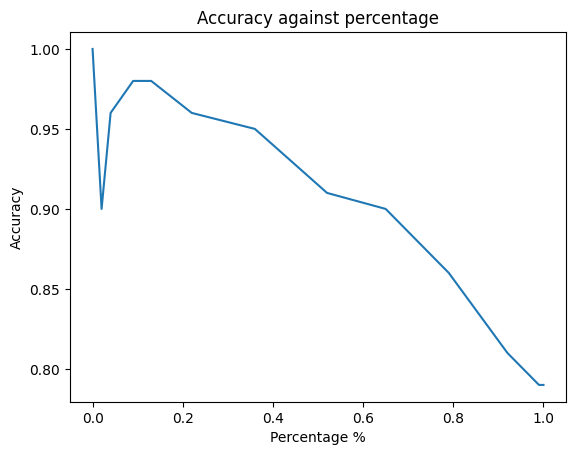

In [6]:
accuracy, threshold = ad.accuracy_v_coverage(smiles_test, activity, rfc_model, k=5, percentage=False)

## the rest

In [ ]:
filter_map, filtered_test, filtered_true_pred  = ad.accuracy_v_coverage(smiles_test, y_true=activity)